# Bivariate analysis template

The goal of the first stage of our feature selection is to find variables which have different mean values for price. Using a p-value threshold, we can inform which variables to use or omit given a theshold. This process requires individual effort to preform bivariate analysis on a given variable w/rt SalePrice. Since this is entirely exploratory and we do not know* which features are important. Of course, this strategy will not account for interactions or subtle differences. 

### There are 3 cases to consider:

1) The variable is continuous
    * Perform a simple linear regression, report p
2) The variable is categorical and has 2 classes
    * Perform a 2 sample t-test, report p
3) The variable is categorical and has more than 2 classes
    * Perform an ANOVA, report p
    
### An outline for each case is performed below. 

*Of course, there are some features which we can manually curate, as needed. This analysis provides a go/no-go threshold which can assist feature selection

In [1]:
#setup some general use functions and import file
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from scipy import stats

ames_housing = pd.read_csv("../../data/train.csv") # assumes you downloaded the whole repository, modify accordingly
ames_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Simple linear regression
The variable is continuous
>"TotalBsmtSF"

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


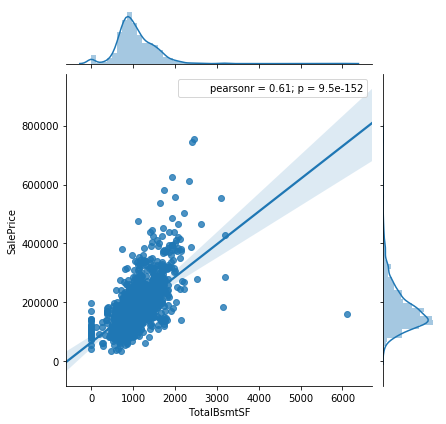

In [2]:
sns.jointplot(x='TotalBsmtSF', y='SalePrice', data=ames_housing, kind="reg") 

p-value = 9.5e-152

In [3]:
stats.linregress(ames_housing.TotalBsmtSF, ames_housing.SalePrice)

LinregressResult(slope=111.10960368712762, intercept=63430.62854550623, rvalue=0.6135805515591953, pvalue=9.484229391502787e-152, stderr=3.744777895039251)

preliminary B coeff = 111.110

## T-test
The variable is categorical, 2 groups
>"CentralAir"

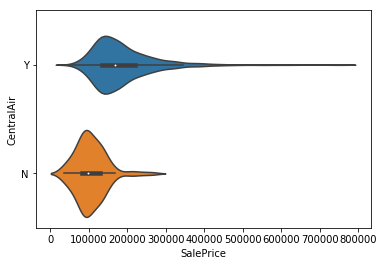

In [4]:
#visualize distributions
sns.violinplot(x="SalePrice", y="CentralAir", data=ames_housing)

In [5]:
#logic: run a two sample t-test of SalePrice comparing the 2 features of CentralAir (Y, N) AND do not assume equal variance
stats.ttest_ind(ames_housing.SalePrice[ames_housing.CentralAir == 'Y'], 
                ames_housing.SalePrice[ames_housing.CentralAir == 'N'], equal_var = False)

Ttest_indResult(statistic=17.267772563668995, pvalue=2.280814388186851e-37)

p-value = 2.28e-37

## ANOVA
The variable is categorical, 3+ groups
>"YrSold"

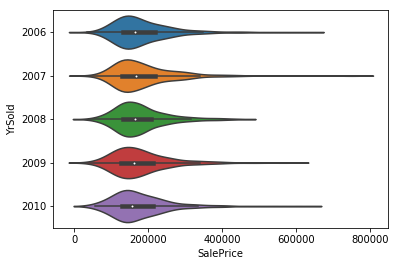

In [6]:
temp = ames_housing.YrSold.astype('category')
sns.violinplot(x="SalePrice", y=temp, data=ames_housing)

In [7]:
stats.f_oneway(ames_housing.SalePrice[ames_housing.YrSold == 2006],
              ames_housing.SalePrice[ames_housing.YrSold == 2007],
              ames_housing.SalePrice[ames_housing.YrSold == 2008],
              ames_housing.SalePrice[ames_housing.YrSold == 2009],
              ames_housing.SalePrice[ames_housing.YrSold == 2010])

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

p-value = 0.630